$Task$-$2:$
    
**Social Media Sentimental Analysis**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path='C:\\Users\\prava\\Downloads\\Social media sentimental analysis\\Tweets.csv'
social_df=pd.read_csv(file_path)
social_df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [3]:
social_df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [4]:
social_df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [5]:
social_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
social_df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [7]:
for i in social_df.columns:
    if social_df[i].dtypes=='O':
        mode=social_df[i].mode()
        social_df[i].fillna(mode.iloc[0],inplace=True)
    else:
        median=social_df[i].median()
        social_df[i].fillna(median,inplace=True)

In [8]:
social_df.isnull().sum()

tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
airline_sentiment_gold          0
name                            0
negativereason_gold             0
retweet_count                   0
text                            0
tweet_coord                     0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64

In [9]:
num=[i for i in dict(social_df.dtypes) if social_df.dtypes[i]!='O']
num

['tweet_id',
 'airline_sentiment_confidence',
 'negativereason_confidence',
 'retweet_count']

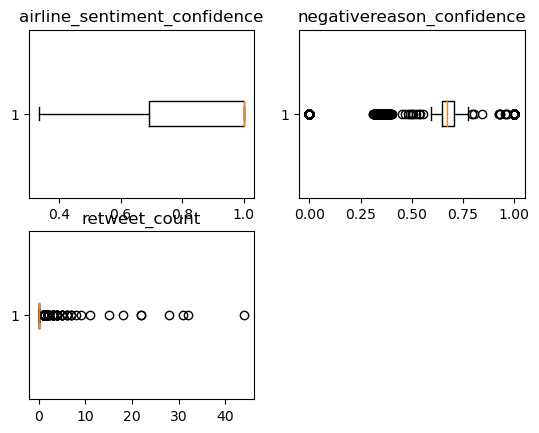

In [10]:
for i in range(1,len(num)):
    plt.subplot(2,2,i)
    plt.boxplot(social_df[num][num[i]],vert=False)
    plt.title(num[i])
plt.show()

In [11]:
df=social_df[['airline_sentiment','text']]
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


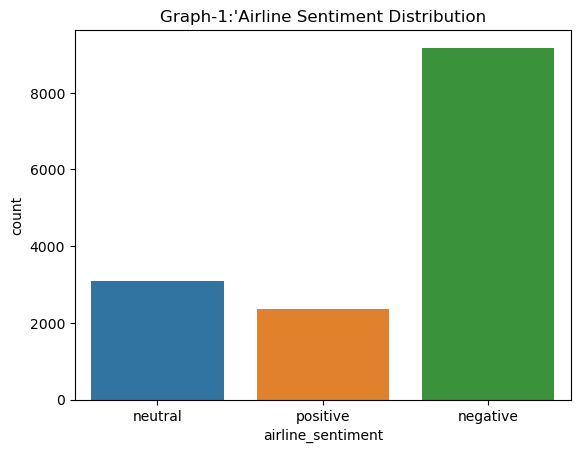

In [12]:
sns.countplot(data=df,x='airline_sentiment')
plt.title("Graph-1:'Airline Sentiment Distribution")
plt.show()

C:\Users\prava\AppData\Local\Temp\ipykernel_17724\198190445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_word']=df['text'].apply(lambda x : len(x.split(' ')))


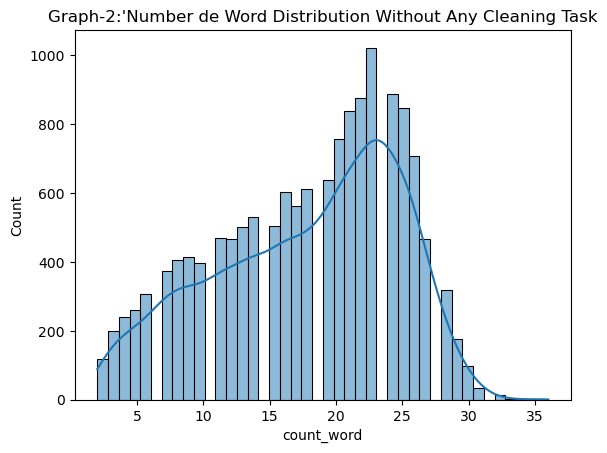

In [13]:
df['count_word']=df['text'].apply(lambda x : len(x.split(' ')))
sns.histplot(data=df,x='count_word',kde=True)
plt.title("Graph-2:'Number de Word Distribution Without Any Cleaning Task")
plt.show()

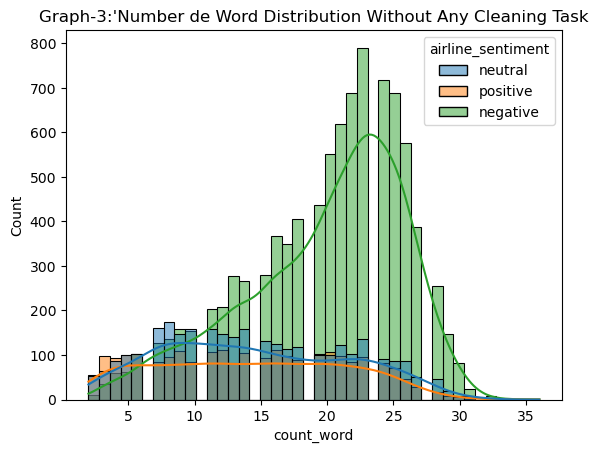

In [14]:
sns.histplot(data=df,x='count_word',hue='airline_sentiment',alpha=0.5,kde=True)
plt.title("Graph-3:'Number de Word Distribution Without Any Cleaning Task")
plt.show()

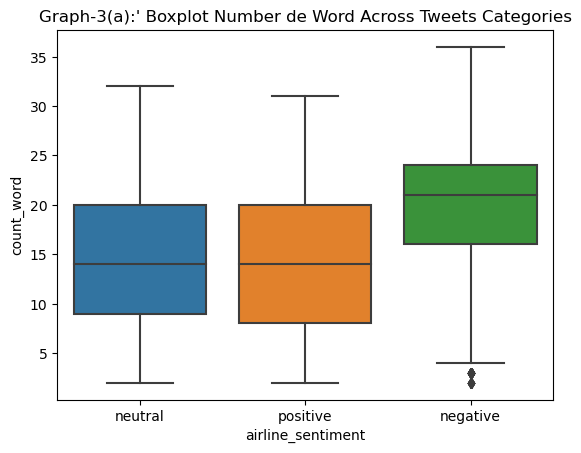

In [15]:
sns.boxplot(data=df,y='count_word',x='airline_sentiment')
plt.title("Graph-3(a):' Boxplot Number de Word Across Tweets Categories")
plt.show()

In [16]:
df.loc[np.logical_or(df['count_word']>35,df['count_word']<=5),:]

,airline_sentiment,text,count_word
0,neutral,@VirginAmerica What @dhepburn said.,4
14,positive,@VirginAmerica Thanks!,2
18,positive,I ❤️ flying @VirginAmerica. ☺️👍,5
46,neutral,@VirginAmerica DREAM http://t.co/oA2dRfAoQ2 h...,5
58,neutral,@VirginAmerica @ladygaga @carrieunderwood - Ca...,5
...,...,...,...
14312,positive,@AmericanAir awesome! Thx,3
14314,negative,"@AmericanAir yes, and rebooked incorrectly.",5
14443,neutral,@AmericanAir hi how are you,5
14600,neutral,http://t.co/EIw2sYb8Fu roberts&amp;s=1 @Americ...,3


In [17]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [27]:
#remove punctuations
def remove_punctuation(text):
    return re.sub(r'[^\w\s]','',text)
#stopwords removal
def remove_stopwords(text):
    stop_words=set(stopwords.words('english'))
    tokens=word_tokenize(text)
    filter_tokens=[word for word in tokens if word.lower() not in stop_words]
    return' '.join(filter_tokens)
#remove numeric
def remove_numeric(text):
    return re.sub(r'\d+','',text)
#Stemming
def apply_stemming(text):
    stemmer=PowerStemmer()
    tokens=word_tokenize(text)
    stemmer_tokens=[stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)
def remove_mentions(text):
    return re.sub(r'@\w+','',text)

In [28]:
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
def apply_stemming(text):
    stemmer= PorterStemmer()
    tokens=word_tokenize(text)
    stemmed_tokens=[stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)
input_text="walking throw the street,a passenger walked towards me,talking about a walked chicken on a streets"
stemmed_text=apply_stemming(input_text)
print(stemmed_text)

walk throw the street , a passeng walk toward me , talk about a walk chicken on a street


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [33]:
import nltk

In [34]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prava\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [40]:
apply_stemming('walking throw the street,a passenger walked towards me,talking about a walked chicken on a streets')

'walk throw the street , a passeng walk toward me , talk about a walk chicken on a street'

In [43]:
def text_preprocessing(text):
    sentence=remove_mentions(text)
    sentence=remove_punctuation(sentence)
    sentence=remove_stopwords(sentence)
    sentence=remove_numeric(sentence)
    return sentence

In [44]:
text_preprocessing("walking throw the street,a passenger walked towards me,talking about a walked chicken on a streets")

'walking throw streeta passenger walked towards metalking walked chicken streets'

In [45]:
df.loc[:,'new_text']=df['text'].apply(lambda x:text_preprocessing(x))


C:\Users\prava\AppData\Local\Temp\ipykernel_17724\259151260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'new_text']=df['text'].apply(lambda x:text_preprocessing(x))


C:\Users\prava\AppData\Local\Temp\ipykernel_17724\3973065475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'new_count_word']=df['new_text'].apply(lambda x : len(x.split(' ')))


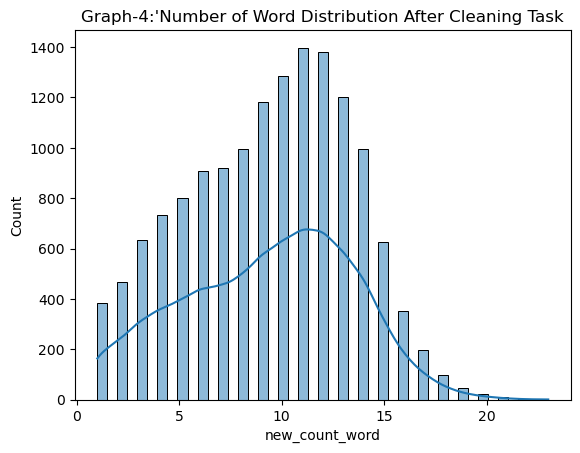

In [46]:
df.loc[:,'new_count_word']=df['new_text'].apply(lambda x : len(x.split(' ')))
sns.histplot(data=df,x='new_count_word',kde=True)
plt.title("Graph-4:'Number of Word Distribution After Cleaning Task")
plt.show()

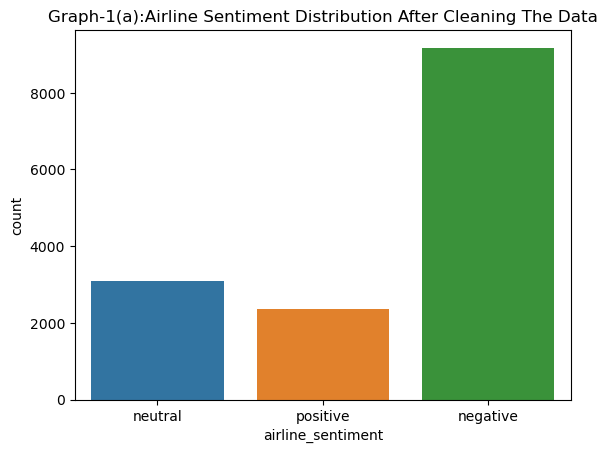

In [47]:
sns.countplot(data=df,x='airline_sentiment')
plt.title("Graph-1(a):Airline Sentiment Distribution After Cleaning The Data")
plt.show()

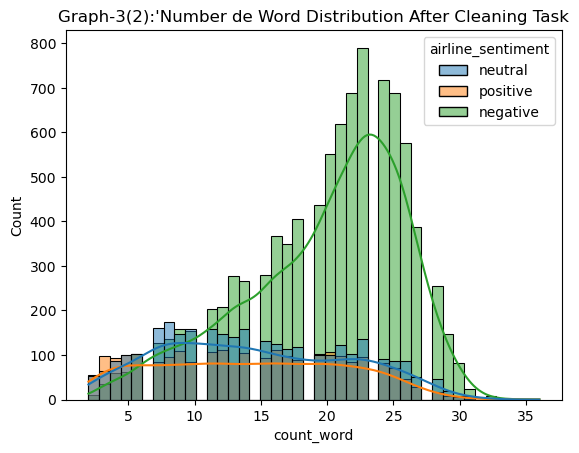

In [48]:
sns.histplot(data=df,x='count_word',hue='airline_sentiment',alpha=0.5,kde=True)
plt.title("Graph-3(2):'Number de Word Distribution After Cleaning Task")
plt.show()